<a href="https://www.spe.org/events/en/2022/conference/22apog/asia-pacific-oil-and-gas-conference-and-exhibition.html"><img src = "https://www.spe.org/binaries/content/gallery/specms/speevents/organization-logos/spe-logo-2020.png" width = 200> 

<h1 align=center><font size = 5>Prediction of Recovery Factor using Machine Learning Methods</font></h1>

<h1 align=center><font size = 4> Munish Kumar, Kannapan Swaminathan, Aizat Rusli, Abel Thomas-hy</font></h1>
<h1 align=center><font size = 3> ERCE 2021 </font></h1>

#### Libraries

In [1]:
# Only install the following libraries if you dont have it, otherwise leave it commented out

#!conda install -c anaconda natsort --yes
#!conda install -c anaconda xlrd --yes

# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
from natsort import natsorted
sns.set()

import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Sklearn Liraries
from sklearn import preprocessing

import datetime
from datetime import timedelta, date 
start = time.time()
%matplotlib inline

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


###### Declare some global variables

In [2]:
#dir_name = r'C:\Users\mkumar\Documents\GitHub\munishkumar-gh.github.io\@Working\SPE_Paper'
dir_name = r'C:\Users\mkumar\Documents\GitHub\@Working\SPE_Paper'
filename_suffix = 'csv'

##### Read in the data and some preprocessing

In [3]:
skiprows = 0

#Means read in the ',' as thousand seperator. Also drops all columns which are unnamed.
df = pd.read_csv("CP3_SST_OIL_RF_data.csv", thousands=',', skiprows = skiprows)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] 
df.head()

,1_Field name,2_Reservoir unit,5_Resource uncertainty,8_Country,10_Region,11_Basin name,15_Latitude,16_Longitude,18_Hydrocarbon type (main),32_Current status year,...,320_Secondary recovery methods,325_EOR methods,333_Improved recovery methods (other),334_Improved recovery methods (drilling),335_Improved recovery methods (stimulation),336_Improved recovery methods (water injection optimization),337_Improved recovery methods (artificial lift),338_Improved recovery methods (sand control),339_Improved recovery methods (other reservoir management),76_Pressure_Temp_depth (ft TVDSS)
0,ABU GHARADIG,ABU ROASH C,1P,EGYPT,AFRICA,ABU GHARADIG,29.7422,28.4925,OIL,1998.0,...,NaN,NaN,ARTIFICIAL LIFT,NaN,NaN,NaN,ROD PUMP,NaN,NaN,9350.0
1,ABU GHARADIG,ABU ROASH E,1P,EGYPT,AFRICA,ABU GHARADIG,29.7422,28.4925,OIL,,...,NaN,NaN,ARTIFICIAL LIFT,NaN,NaN,NaN,ROD PUMP,NaN,NaN,9650.0
2,AGBADA,D5.20X SAND,1P,NIGERIA,AFRICA,NIGER DELTA,4.9326,6.9791,OIL,,...,NaN,NaN,DRILLING/OTHER RESERVOIR MANAGEMENT,INFILL WELL,NaN,NaN,NaN,NaN,HIGH WATER-CUT WELL SHUT-IN,NaN
3,AGBAMI,AKATA (13MY-18MY),1P,NIGERIA,AFRICA,NIGER DELTA,3.4000,6.5833,OIL,,...,CONTINUOUS WATER INJECTION/GAS INJECTION/GAS R...,MISCIBLE,STIMULATION/WATER INJECTION OPTIMIZATION/SAND ...,NaN,HYDRAULIC FRACTURING (SINGLE STAGE),WATER INJECTION ON A ZONAL BASIS,NaN,GRAVEL PACK/SAND SCREEN/FRAC PACK,GAS INJECTION OPTIMIZATION/SAND CLEANING/SIDET...,NaN
4,AHWAZ,ASMARI,1P,IRAN,MIDDLE EAST,ZAGROS,31.2095,48.9490,OIL,2010.0,...,GAS INJECTION,NaN,ARTIFICIAL LIFT,NaN,NaN,NaN,ESP/GAS LIFT,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 63 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   1_Field name                                                  712 non-null    object 
 1   2_Reservoir unit                                              712 non-null    object 
 2   5_Resource uncertainty                                        712 non-null    object 
 3   8_Country                                                     712 non-null    object 
 4   10_Region                                                     712 non-null    object 
 5   11_Basin name                                                 712 non-null    object 
 6   15_Latitude                                                   712 non-null    float64
 7   16_Longitude                                                  712 non-n

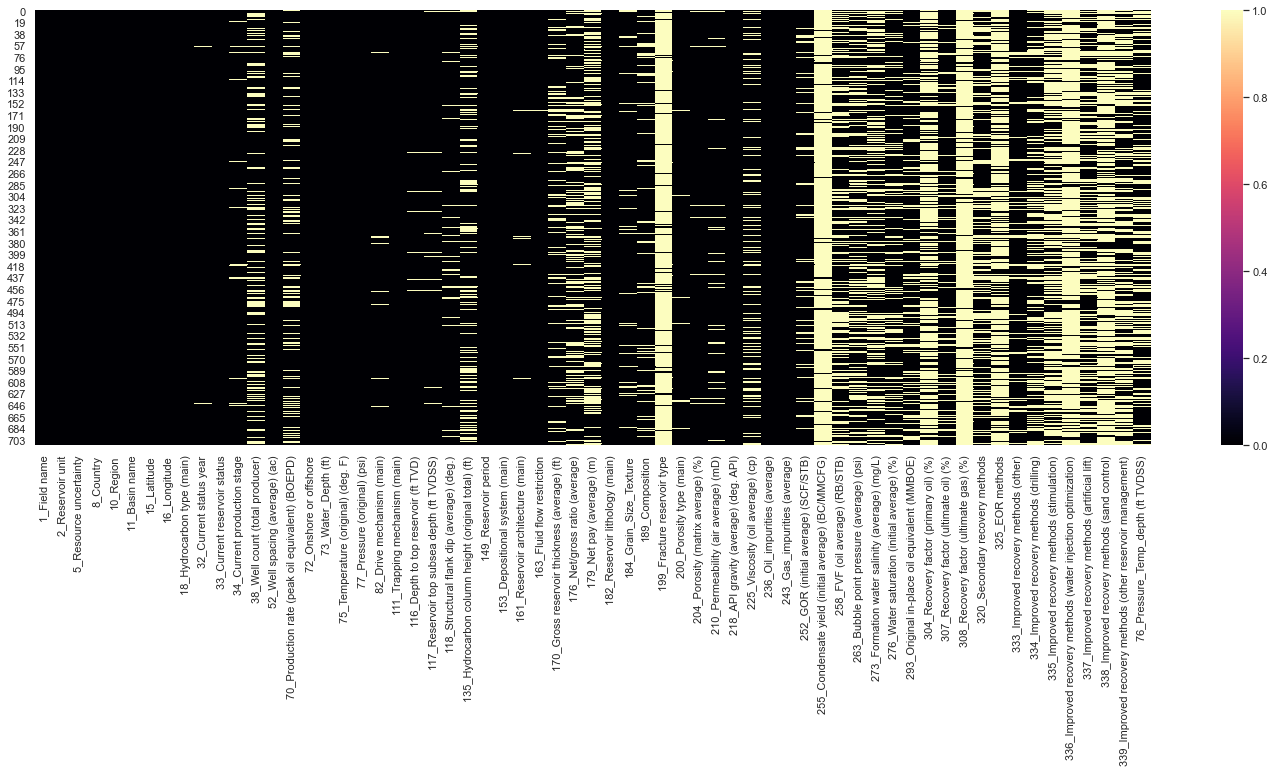

In [32]:
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(df.isnull(), ax=ax, cmap="magma")
plt.grid()
plt.show()

Visualize the location of the different fields spatially

In [30]:
# https://plotly.com/python/map-configuration/
fig = go.Figure(
    data=go.Scattergeo(
        lon = df['16_Longitude'], lat = df['15_Latitude'], text = df['52_Well spacing (average) (ac)'],
        marker = dict(color = df['307_Recovery factor (ultimate oil) (%)'], colorscale = 'hot', 
                      reversescale = False, opacity = 0.5, size = 10, 
                      colorbar = dict(titleside = "right", outlinecolor = "rgba(68, 68, 68, 0)", 
                                      ticks = "outside", showticksuffix = "last", dtick = 15
                                     )
                     )
    )
)

fig.update_traces(marker=dict(size=15), selector=dict(mode='markers'))

fig.update_geos(
    lataxis_showgrid=True, lonaxis_showgrid=True,
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showcountries=True, countrycolor="RebeccaPurple",
    projection_type="natural earth"
)

fig.update_layout(height=300, margin=dict(l=0, r=0, b=0, t=25), title = 'Well Spacing & Recovery Factor By Country',
                  #geo_scope='usa', 
                 )
fig.show()

In [33]:
count = 'Completed Process'
elapsed = (time.time() - start)
print ("%s in %s seconds" % (count,elapsed))

Completed Process in 13.505144357681274 seconds
